In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import math
import ScraperFC as sfc
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from PIL import Image
from mplsoccer import PyPizza, FontManager
from scipy import stats
import pickle as pkl

import warnings
warnings.filterwarnings('ignore')

In [4]:
URL1 = 'https://github.com/googlefonts/robotoslab/blob/main/fonts/ttf/RobotoSlab-Light.ttf?raw=true'
robotoslab_light = FontManager(URL1)
URL2 = 'https://github.com/googlefonts/robotoslab/blob/main/fonts/ttf/RobotoSlab-Regular.ttf?raw=true'
robotoslab_regular = FontManager(URL2)
URL3 = 'https://github.com/googlefonts/robotoslab/blob/main/fonts/ttf/RobotoSlab-Bold.ttf?raw=true'
robotoslab_bold = FontManager(URL3)

## ETL

In [5]:
def filter_by_position(df, position):
    return df[df['Positions'].apply(lambda positions: position in positions)]

In [17]:
with open('D:\Futbol\Analisis de datos\Diagramas de renidmiento\pkl\EPL_players_stats.pkl', 'rb') as archivo:
    df_stats = pkl.load(archivo)

with open('D:\Futbol\Analisis de datos\equipos_colores.pkl', 'rb') as archivo:
    equipos_colores = pkl.load(archivo)

In [7]:
df_stats_cam = filter_by_position(df_stats, 'Attacking Midfield')
df_stats_cam['minutesplayed'] = df_stats_cam['stats_Min'].str.replace(',', '').astype(int)

In [8]:
df_stats_cam.columns.to_list()

['Player',
 'stats_Nation',
 'stats_Pos',
 'stats_Squad',
 'stats_Comp',
 'stats_Age',
 'stats_Born',
 'stats_MP',
 'stats_Starts',
 'stats_Min',
 'stats_90s',
 'stats_Gls',
 'stats_Ast',
 'stats_G+A',
 'stats_G-PK',
 'stats_PK',
 'stats_PKatt',
 'stats_CrdY',
 'stats_CrdR',
 'stats_xG',
 'stats_npxG',
 'stats_xAG',
 'stats_npxG+xAG',
 'stats_PrgC',
 'stats_PrgP',
 'stats_PrgR',
 'stats_Gls.1',
 'stats_Ast.1',
 'stats_G+A.1',
 'stats_G-PK.1',
 'stats_G+A-PK',
 'stats_xG.1',
 'stats_xAG.1',
 'stats_xG+xAG',
 'stats_npxG.1',
 'stats_npxG+xAG.1',
 'shooting_Nation',
 'shooting_Pos',
 'shooting_Squad',
 'shooting_Comp',
 'shooting_Age',
 'shooting_Born',
 'shooting_90s',
 'shooting_Gls',
 'shooting_Sh',
 'shooting_SoT',
 'shooting_SoT%',
 'shooting_Sh/90',
 'shooting_SoT/90',
 'shooting_G/Sh',
 'shooting_G/SoT',
 'shooting_Dist',
 'shooting_FK',
 'shooting_PK',
 'shooting_PKatt',
 'shooting_xG',
 'shooting_npxG',
 'shooting_npxG/Sh',
 'shooting_G-xG',
 'shooting_np:G-xG',
 'passing_Nation'

player
stats_Squad
stats_90s
stats_Min
stats_Gls
stats_Ast
stats_xG
stats_xAG
stats_PrgC
stats_PrgP
gca_PassLive
passing_Cmp%
passing_KP
passing_1/3
passing_types_TB
defensive actions = defense_Tkl + defense_Tkl.1 + defense_Int
possession_Att
possession_Succ%
possession_1/3
misc_Fld

In [9]:
df_stats_cam['defensiveActions'] = df_stats_cam['defense_Tkl'] + df_stats_cam['defense_Tkl.1'] + df_stats_cam['defense_Int']
df_stats_cam['diff_xG'] = df_stats_cam['stats_Gls'] - df_stats_cam['stats_xG']
df_stats_cam['diff_xAG'] = df_stats_cam['stats_Ast'] - df_stats_cam['stats_xAG']

In [10]:
parametros_radar = ['Player','stats_Squad', 'minutesplayed', 'stats_Gls', 'diff_xG', 'stats_Ast', 'diff_xAG', 'gca_PassLive', 'passing_Cmp%','stats_PrgP',
                    'passing_KP', 'passing_1/3','passing_types_TB', 'defensiveActions', 'stats_PrgC', 'possession_1/3', 'possession_Att', 'possession_Succ%']

nombres_parametros = ['Player', 'Team', 'minutesplayed', 'Goals', 'Goals - xG', 'Asists', 'Asists - xAG', 'Passes to shots', 'Passes succ %',
                      'Prog passes', 'Key passes', 'Passes Att 3rd', 'Through passes', 'Def acctions', 'Prog Carries', 'Carries Att 3rd',
                      'Dribbling', 'Dribbling succ %']

text_colors = ['#50ADBF', '#50ADBF', '#50ADBF', '#50ADBF', '#50ADBF', '#5067BF', '#5067BF', '#5067BF', '#5067BF', '#5067BF','#50BFAE', '#5E50BF','#5E50BF', '#90A8BF', '#90A8BF']

diccionario_parametros = {parametros_radar[i]: nombres_parametros[i] for i in range(len(parametros_radar))}

params = list(diccionario_parametros.keys())[3:]
params_names = list(diccionario_parametros.values())[3:]

In [11]:
df_cam_filt = df_stats_cam[list(diccionario_parametros.keys())]

In [52]:
jugador1 = 'Kevin De Bruyne'
values_player = list(df_cam_filt[df_cam_filt['Player'] == jugador1].iloc[:,3:].reset_index(drop=True).iloc[0].values)

In [53]:
values = []
for x in range(len(params)):   
    values.append(math.floor(stats.percentileofscore(df_cam_filt[df_cam_filt['minutesplayed'] > df_cam_filt['minutesplayed'].quantile(.3)][params[x]], values_player[x])))

values

[66, 87, 97, 13, 81, 28, 70, 87, 69, 85, 24, 62, 62, 47, 13]

## Visualizacion

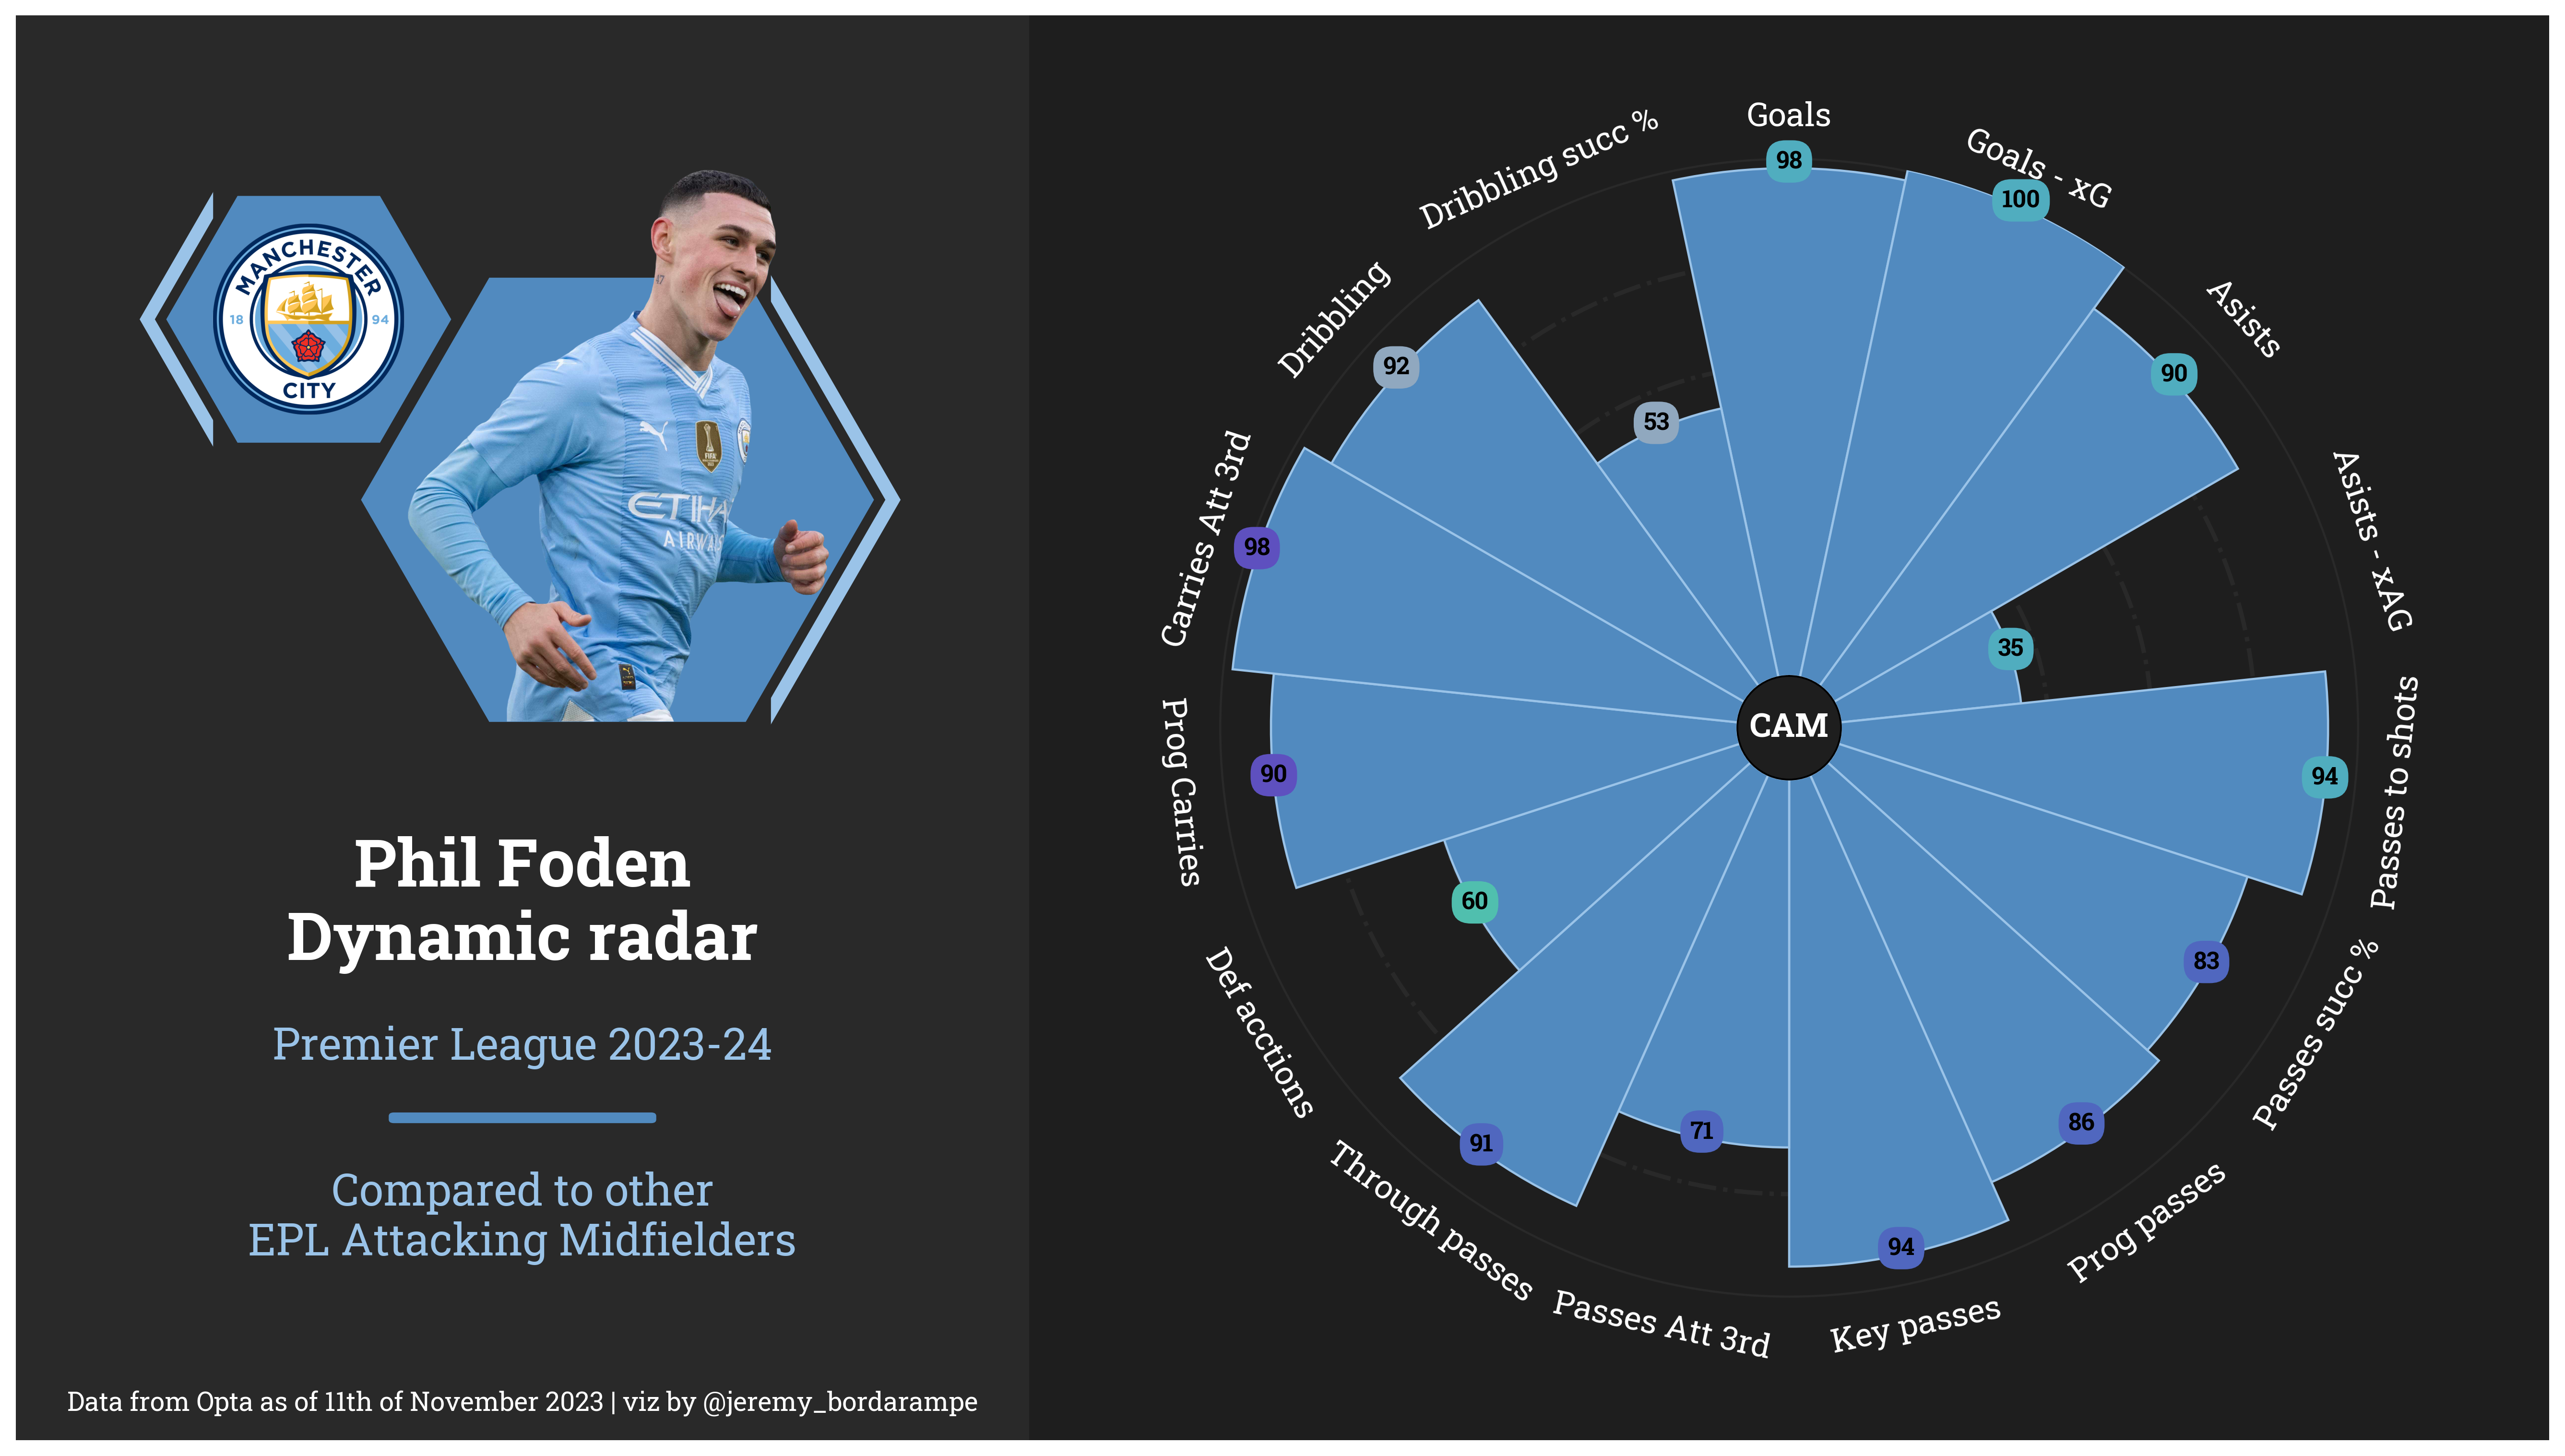

In [14]:
# Crear una figura sin bordes ni márgenes
fig, ax = plt.subplots(figsize=(16, 9), dpi=330)

# Definir los colores del fondo
color_left = '#292929'  # Color de la izquierda
color_right = '#1E1E1E'  # Color de la derecha

# Definir las dimensiones de los rectángulos
width_left = 0.4
width_right = 0.6
height = 1  # La altura es la misma para ambos rectángulos

# Definir las posiciones de los rectángulos
x_left = 0
y_left = 0
x_right = width_left
y_right = 0

# Crear un fondo con dos colores
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
rect_left = ax.add_patch(patches.Rectangle((x_left, y_left), width_left, height, color=color_left, linewidth=0))
rect_right = ax.add_patch(patches.Rectangle((x_right, y_right), width_right, height, color=color_right, linewidth=0))
ax.axis('off')

# Ajustar los márgenes de la figura para que no queden bordes
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

# Armado de fondo de imagenes
# Agregar un eje dentro del rectángulo izquierdo
inset_ax_left = inset_axes(ax, width=6, height=6, loc='center',
                           bbox_to_anchor=(x_left, y_left + .16, width_left, height),
                           bbox_transform=ax.transAxes)
inset_ax_left.axis('off')

# haxagono de jugador
player_hexagon = patches.RegularPolygon((0.6, 0.5), numVertices=6, radius=0.27, orientation=np.radians(30), color='#518ABF', ec='none', zorder=2)
inset_ax_left.add_patch(player_hexagon)

player_outer_hexagon = patches.RegularPolygon((0.6, 0.5), numVertices=6, radius=0.29, orientation=np.radians(30), color='none', ec='#9AC3E8', linewidth=6, zorder=0)
inset_ax_left.add_patch(player_outer_hexagon)

# Hexagono de escudo de equipo 
logo_hexagon = patches.RegularPolygon((0.275, .69), numVertices=6, radius=0.15, orientation=np.radians(30), color='#518ABF', ec='none', zorder=2)
inset_ax_left.add_patch(logo_hexagon)

logo_outer_hexagon = patches.RegularPolygon((0.275, .69), numVertices=6, radius=0.17, orientation=np.radians(30), color='none', ec='#9AC3E8', linewidth=6, zorder=0)
inset_ax_left.add_patch(logo_outer_hexagon)

rect = patches.Rectangle((.175, .22), .585, .65, transform=inset_ax_left.transAxes, color=color_left, zorder=1)
inset_ax_left.add_patch(rect)

# Agregado de imagenes
# Funciones para transformar las coordenadas
DC_to_FC = inset_ax_left.transData.transform  # Transforma las coordenadas de datos a coordenadas de figura
FC_to_NFC = fig.transFigure.inverted().transform  # Transforma las coordenadas de figura a coordenadas normalizadas de figura
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))  # Función lambda para encadenar ambas transformaciones

logo_img_path = 'D:\Futbol\Analisis de datos\Analisis presion alata en PL 23-24\img\escudos PL\Manchester City.png'
player_img_path = 'D:\Futbol\Analisis de datos\Diagramas de renidmiento\img\pill_foden_23-24.png'

# Escudo del equipo
# Cargar la imagen del escudo del equipo y redimensionarla
logo = Image.open(logo_img_path)
desired_size = (1000, 1000)  # Tamaño deseado para las imágenes redimensionadas
logo = logo.resize(desired_size, Image.Resampling.LANCZOS)

# Convertir la imagen redimensionada de PIL a un array de matplotlib
logo = np.array(logo)

# Obtener las coordenadas transformadas para colocar la imagen
coord = DC_to_NFC((0.275, .69))  # Coordenadas transformadas

# Crear un subeje para la imagen del escudo utilizando las coordenadas transformadas
ax_logo = inset_axes(inset_ax_left, width=1.7, height=1.7, loc='center',
                     bbox_to_anchor=coord, bbox_transform=inset_ax_left.transAxes)

ax_logo.imshow(logo)
ax_logo.axis('off')

# Foto del jugador
# Cargar la imagen del escudo del equipo y redimensionarla
player_img = Image.open(player_img_path)

# Convertir la imagen redimensionada de PIL a un array de matplotlib
player_img = np.array(player_img)

# Obtener las coordenadas transformadas para colocar la imagen
coord = DC_to_NFC((0.6, 0.5 + .058))  # Coordenadas transformadas

# Crear un subeje para la imagen del escudo utilizando las coordenadas transformadas
ax_logo = inset_axes(inset_ax_left, width=3.5, height=3.5, loc='center',
                     bbox_to_anchor=coord, bbox_transform=inset_ax_left.transAxes)

ax_logo.imshow(player_img)
ax_logo.axis('off')

# Texto
# Creacion de axis 
inset_ax_left_text = inset_axes(ax, width=6.4, height=4.5, loc='center',
                           bbox_to_anchor=(x_left, y_left - .249, width_left, height),
                           bbox_transform=ax.transAxes)
inset_ax_left_text.axis('off')

inset_ax_left_text.annotate(
        xy=(.5, .75),
        text=f'Phil Foden\nDynamic radar',
        size=30,
        color='white',
        ha='center',
        va='center',
        annotation_clip=False,
        fontproperties=robotoslab_bold.prop
    )

inset_ax_left_text.annotate(
        xy=(.5, .55),
        text=f'Premier League 2023-24',
        size=20,
        color='#9AC3E8',
        ha='center',
        va='center',
        annotation_clip=False,
        fontproperties=robotoslab_regular.prop
    )

line_width = 0.25
line_height = 0.001  # Altura pequeña para simular una línea
line_radius = line_height / 2
line_x = .5 - (line_width/2)
line_y = 0.45


rounded_line = patches.FancyBboxPatch((line_x, line_y), line_width, line_height,
                                      boxstyle='round,pad=0.007,rounding_size=0.005',
                                      facecolor='#518ABF', ec='none')
inset_ax_left_text.add_patch(rounded_line)

inset_ax_left_text.annotate(
        xy=(.5, .31),
        text=f'Compared to other\nEPL Attacking Midfielders',
        size=20,
        color='#9AC3E8',
        ha='center',
        va='center',
        annotation_clip=False,
        fontproperties=robotoslab_regular.prop
    )

# Disclaimer
inset_ax_left_text.annotate(
        xy=(.5, 0.05),
        text=f'Data from Opta as of 11th of November 2023 | viz by @jeremy_bordarampe',
        size=12,
        color='white',
        ha='center',
        va='center',
        annotation_clip=False,
        fontproperties=robotoslab_regular.prop
    )

# Grafico de Pizza

# Agregar un eje dentro del rectángulo izquierdo
inset_ax_right = fig.add_axes([x_right - .1, y_right + .1, .8, .8], polar=True)
inset_ax_right.set_facecolor(color_right)

# inset_ax_right.axis('off')

baker = PyPizza(
    params=params_names,
    background_color=color_right,
    straight_line_color=color_right,
    straight_line_lw=1,
    last_circle_lw=2,
    last_circle_color=color_left,
    other_circle_color=color_left,
    other_circle_lw=2,
    other_circle_ls='-.',
    inner_circle_size=10
)

# plot pizza
baker.make_pizza(
    values,            
    ax=inset_ax_right,           
    color_blank_space=None,
    value_bck_colors=text_colors,
    blank_alpha=.2,
    kwargs_slices=dict(color='#518ABF', edgecolor='#9AC3E8', zorder=2, linewidth=1),
    kwargs_params=dict(color='white', fontsize=15,
                       fontproperties=robotoslab_regular.prop, va="center"),
    kwargs_values=dict(color='#000000', fontsize=11,
                       fontproperties=robotoslab_bold.prop, zorder=3,
                       bbox=dict(edgecolor='#000000', boxstyle='round,pad=0.4,rounding_size=.8',
                       lw=0))
)

inset_ax_right.annotate(
        xy=(0, -10),
        text=f'CAM',
        size=15,
        color='white',
        ha='center',
        va='center',
        annotation_clip=False,
        fontproperties=robotoslab_bold.prop
    )

# Guardar la figura sin bordes blancos
plt.savefig('D:/Futbol/Analisis de datos/Diagramas de renidmiento/img/fondo_sin_bordes.png', bbox_inches='tight', pad_inches=0)

# Mostrar la figura
plt.show()

In [ ]:
def plot_pizza_view(df:pd.DataFrame, player:str, season:str, compare_positon:str, path_img:str, path_save:str):
    
    team = df[df['Player'] == player]['stats_Squad'].iloc[0]
    
    fig, ax = plt.subplots(figsize=(16, 9), dpi=330)

    # Definir los colroes del equipo
    color_light = equipos_colores[df[df['Player'] == player]['stats_Squad'].iloc[0]][0]
    color_dark = equipos_colores[df[df['Player'] == player]['stats_Squad'].iloc[0]][1]
    
    # Definir los colores del fondo
    color_left = '#292929'  # Color de la izquierda
    color_right = '#1E1E1E'  # Color de la derecha

    # Definir las dimensiones de los rectángulos
    width_left = 0.4
    width_right = 0.6
    height = 1

    # Definir las posiciones de los rectángulos
    x_left = 0
    y_left = 0
    x_right = width_left
    y_right = 0

    # Crear un fondo con dos colores
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    rect_left = ax.add_patch(patches.Rectangle((x_left, y_left), width_left, height, color=color_left, linewidth=0))
    rect_right = ax.add_patch(patches.Rectangle((x_right, y_right), width_right, height, color=color_right, linewidth=0))
    ax.axis('off')

    # Ajustar los márgenes de la figura para que no queden bordes
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

    # Armado de fondo de imagenes
    # Agregar un eje dentro del rectángulo izquierdo
    inset_ax_left = inset_axes(ax, width=6, height=6, loc='center',
                            bbox_to_anchor=(x_left, y_left + .16, width_left, height),
                            bbox_transform=ax.transAxes)
    inset_ax_left.axis('off')

    # haxagono de jugador
    player_hexagon = patches.RegularPolygon((0.6, 0.5), numVertices=6, radius=0.27, orientation=np.radians(30), color=color_dark, ec='none', zorder=2)
    inset_ax_left.add_patch(player_hexagon)

    player_outer_hexagon = patches.RegularPolygon((0.6, 0.5), numVertices=6, radius=0.29, orientation=np.radians(30), color='none', ec=color_light, linewidth=6, zorder=0)
    inset_ax_left.add_patch(player_outer_hexagon)

    # Hexagono de escudo de equipo 
    logo_hexagon = patches.RegularPolygon((0.275, .69), numVertices=6, radius=0.15, orientation=np.radians(30), color=color_dark, ec='none', zorder=2)
    inset_ax_left.add_patch(logo_hexagon)

    logo_outer_hexagon = patches.RegularPolygon((0.275, .69), numVertices=6, radius=0.17, orientation=np.radians(30), color='none', ec=color_light, linewidth=6, zorder=0)
    inset_ax_left.add_patch(logo_outer_hexagon)

    rect = patches.Rectangle((.175, .22), .585, .65, transform=inset_ax_left.transAxes, color=color_left, zorder=1)
    inset_ax_left.add_patch(rect)

    # Agregado de imagenes
    # Funciones para transformar las coordenadas
    DC_to_FC = inset_ax_left.transData.transform  # Transforma las coordenadas de datos a coordenadas de figura
    FC_to_NFC = fig.transFigure.inverted().transform  # Transforma las coordenadas de figura a coordenadas normalizadas de figura
    DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))  # Función lambda para encadenar ambas transformaciones

    logo_img_path = path_img + '\escudos EPL\\' + team + '.png'
    player_img_path = path_img + '\jugadores\EPL\\' + str(player).replace(' ', '_').lower() + '_' + season + '.png'

    # Escudo del equipo
    # Cargar la imagen del escudo del equipo y redimensionarla
    logo = Image.open(logo_img_path)
    desired_size = (1000, 1000)  # Tamaño deseado para las imágenes redimensionadas
    logo = logo.resize(desired_size, Image.Resampling.LANCZOS)

    # Convertir la imagen redimensionada de PIL a un array de matplotlib
    logo = np.array(logo)

    # Obtener las coordenadas transformadas para colocar la imagen
    coord = DC_to_NFC((0.275, .69))  # Coordenadas transformadas

    # Crear un subeje para la imagen del escudo utilizando las coordenadas transformadas
    ax_logo = inset_axes(inset_ax_left, width=1.7, height=1.7, loc='center',
                        bbox_to_anchor=coord, bbox_transform=inset_ax_left.transAxes)

    ax_logo.imshow(logo)
    ax_logo.axis('off')

    # Foto del jugador
    # Cargar la imagen del escudo del equipo y redimensionarla
    player_img = Image.open(player_img_path)

    # Convertir la imagen redimensionada de PIL a un array de matplotlib
    player_img = np.array(player_img)

    # Obtener las coordenadas transformadas para colocar la imagen
    coord = DC_to_NFC((0.6, 0.5 + .058))  # Coordenadas transformadas

    # Crear un subeje para la imagen del escudo utilizando las coordenadas transformadas
    ax_logo = inset_axes(inset_ax_left, width=3.5, height=3.5, loc='center',
                        bbox_to_anchor=coord, bbox_transform=inset_ax_left.transAxes)

    ax_logo.imshow(player_img)
    ax_logo.axis('off')

    # Texto
    # Creacion de axis 
    inset_ax_left_text = inset_axes(ax, width=6.4, height=4.5, loc='center',
                                    bbox_to_anchor=(x_left, y_left - .249, width_left, height),
                                    bbox_transform=ax.transAxes)
    inset_ax_left_text.axis('off')

    inset_ax_left_text.annotate(xy=(.5, .75),
                                text=player + f'\nDynamic radar',
                                size=30,
                                color='white',
                                ha='center',
                                va='center',
                                annotation_clip=False,
                                fontproperties=robotoslab_bold.prop)

    inset_ax_left_text.annotate(xy=(.5, .55),
                                text='Premier League ' + season,
                                size=20,
                                color=color_light,
                                ha='center',
                                va='center',
                                annotation_clip=False,
                                fontproperties=robotoslab_regular.prop)

    line_width = 0.25
    line_height = 0.001
    line_radius = line_height / 2
    line_x = .5 - (line_width/2)
    line_y = 0.45


    rounded_line = patches.FancyBboxPatch((line_x, line_y), line_width, line_height,
                                        boxstyle='round,pad=0.007,rounding_size=0.005',
                                        facecolor=color_dark, ec='none')
    inset_ax_left_text.add_patch(rounded_line)

    inset_ax_left_text.annotate(xy=(.5, .31),
                                text=f'Compared to other\nEPL ' + compare_positon,
                                size=20,
                                color=color_light,
                                ha='center',
                                va='center',
                                annotation_clip=False,
                                fontproperties=robotoslab_regular.prop)

    # Disclaimer
    inset_ax_left_text.annotate(xy=(.5, 0.05),
                                text=f'Data from Opta as of 11th of November 2023 | viz by @jeremy_bordarampe',
                                size=12,
                                color='white',
                                ha='center',
                                va='center',
                                annotation_clip=False,
                                fontproperties=robotoslab_regular.prop)

    # Grafico de Pizza

    # Agregar un eje dentro del rectángulo izquierdo
    inset_ax_right = fig.add_axes([x_right - .1, y_right + .1, .8, .8], polar=True)
    inset_ax_right.set_facecolor(color_right)

    baker = PyPizza(params=params_names,
                    background_color=color_right,
                    straight_line_color=color_right,
                    straight_line_lw=1,
                    last_circle_lw=2,
                    last_circle_color=color_left,
                    other_circle_color=color_left,
                    other_circle_lw=2,
                    other_circle_ls='-.',
                    inner_circle_size=10)

    # plot pizza
    baker.make_pizza(values, 
                    ax=inset_ax_right,
                    color_blank_space=None,
                    value_bck_colors=text_colors,
                    blank_alpha=.2,
                    kwargs_slices=dict(color=color_dark, edgecolor=color_light, zorder=2, linewidth=1),
                    kwargs_params=dict(color='white', fontsize=15,
                                        fontproperties=robotoslab_regular.prop, va="center"),
                    kwargs_values=dict(color='#000000', fontsize=11,
                                        fontproperties=robotoslab_bold.prop, zorder=3,
                                        bbox=dict(edgecolor='#000000', boxstyle='round,pad=0.4,rounding_size=.8',
                                        lw=0)))

    inset_ax_right.annotate(xy=(0, -10),
                            text=f'CAM',
                            size=15,
                            color='white',
                            ha='center',
                            va='center',
                            annotation_clip=False,
                            fontproperties=robotoslab_bold.prop)

    # Guardar la figura sin bordes blancos
    plt.savefig(path_save + player + ' dynamic radar.png', bbox_inches='tight', pad_inches=0)

    # Mostrar la figura
    plt.show()

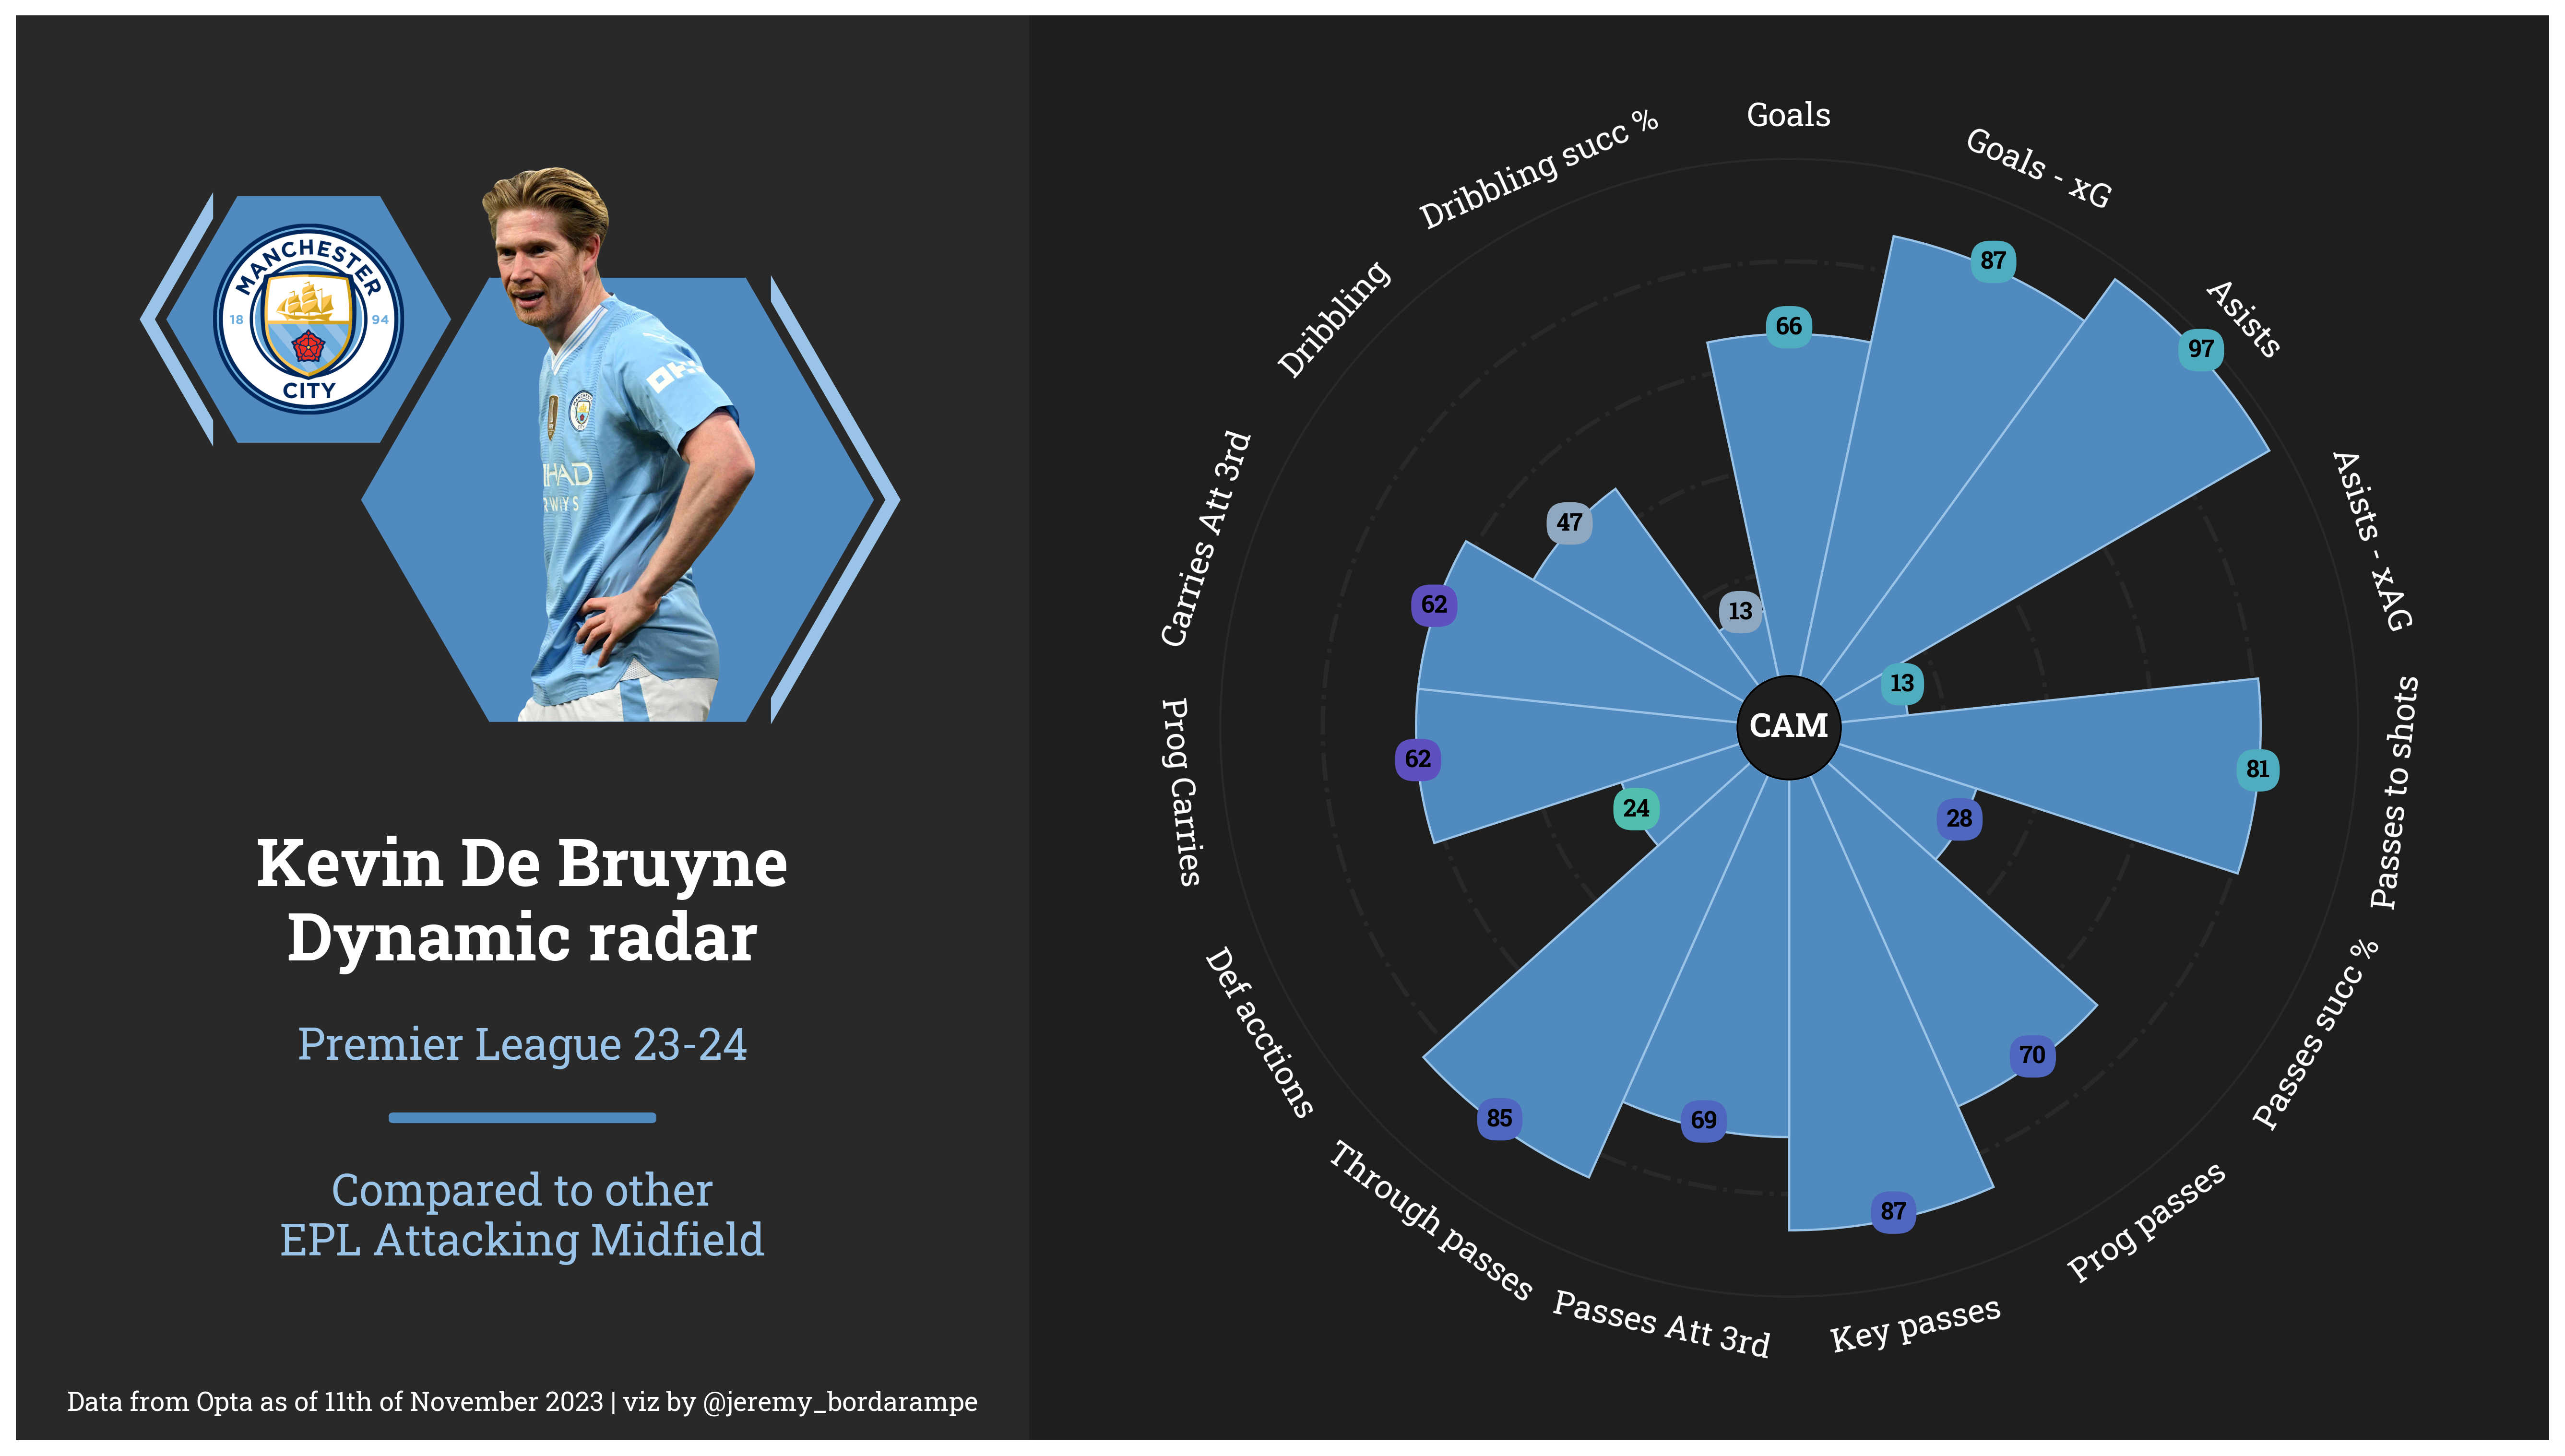

In [54]:
plot_pizza_view(df_cam_filt, 'Kevin De Bruyne', '23-24', 'Attacking Midfield', 'D:\Futbol\Analisis de datos\img','D:\Futbol\Analisis de datos\Diagramas de renidmiento\img\\')

In [49]:
df_stats_cam[df_stats_cam['Player'] == 'Kevin De Bruyne']

Player stats_Nation stats_Pos      stats_Squad      stats_Comp  \
125  Kevin De Bruyne       be BEL        MF  Manchester City  Premier League   

     stats_Age  stats_Born  stats_MP  stats_Starts stats_Min  ...  misc_OG  \
125         32        1991        18            15     1,221  ...        0   

     misc_Recov  misc_Won  misc_Lost  misc_Won%  \
125          54         6          5       54.5   

                                  Positions  minutesplayed  defensiveActions  \
125  [Attacking Midfield, Central Midfield]           1221                25   

     diff_xG  diff_xAG  
125      1.6      -1.5  

[1 rows x 243 columns]

In [55]:
import colorsys
import matplotlib.pyplot as plt

def rgb_to_hex(rgb):
    return '#{:02x}{:02x}{:02x}'.format(int(rgb[0] * 255), int(rgb[1] * 255), int(rgb[2] * 255))

def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip('#')
    return tuple(int(hex_color[i:i+2], 16) / 255.0 for i in (0, 2, 4))

def generate_analogous_colors(center_color, n=6):
    rgb_center = hex_to_rgb(center_color)
    hsv_center = colorsys.rgb_to_hsv(*rgb_center)
    
    step = 30 / 360.0  # step of 30 degrees in hue
    analogous_colors = []
    
    for i in range(1, (n // 2) + 1):
        new_hue_positive = (hsv_center[0] + i * step) % 1.0
        new_hue_negative = (hsv_center[0] - i * step) % 1.0
        analogous_colors.append(colorsys.hsv_to_rgb(new_hue_positive, hsv_center[1], hsv_center[2]))
        analogous_colors.append(colorsys.hsv_to_rgb(new_hue_negative, hsv_center[1], hsv_center[2]))
    
    analogous_colors_rgb = [rgb_to_hex(color) for color in analogous_colors]
    
    return analogous_colors_rgb

In [57]:
analogous_colors = generate_analogous_colors(equipos_colores[df_stats_cam[df_stats_cam['Player'] == 'Kevin De Bruyne']['stats_Squad'].iloc[0]][0])

In [59]:
equipos_colores[df_stats_cam[df_stats_cam['Player'] == 'Kevin De Bruyne']['stats_Squad'].iloc[0]][0]

'#9AC3E8'

In [58]:
analogous_colors

['#9a9be8', '#9ae8e6', '#bf9ae8', '#9ae8bf', '#e69ae8', '#9be89a']